In [6]:
#hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# hide
!git clone https://github.com/takotab/fastseq.git
%cd fastseq
!pip install -e .

# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai2](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:

```
git clone https://github.com/takotab/fastseq.git
cd fastseq
pip install -e .
```

Please be aware that this extention on fastai2 is made for univarate data (The difference is explained [here](https://stats.stackexchange.com/a/342821/159578)).


If you have tried it, please let me know. Even if you got stuck and werent able to install. You can send me an [email](mailto:TakoTabak+fastseq@gmail.com), leave a comment in the (excelent) [fastai timeseries forum](https://forums.fast.ai/t/time-series-sequential-data-study-group/29686), or make an issue in [github](https://github.com/takotab/fastseq/issues). I would love to know what you think of libary any tips or comments. Do you work on these kind of data, would want more explanation of the model, would you like to see the approuch on multivariate ts. Where do think I should go with this.

Thank you

## How to use

In [7]:
from fastai2.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
from fastseq.nbeats.callbacks import *

In [8]:
horizon, lookback = 7, 35    

Getting the data fastai style:

In [9]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


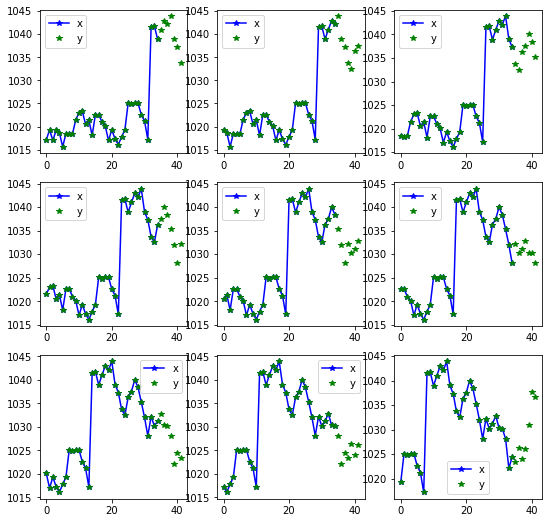

In [12]:
data.show_batch()

In [13]:
learn = nbeats_learner(data, season = lookback+horizon)   

SuggestedLRs(lr_min=0.10964782238006592, lr_steep=2.75422871709452e-06)

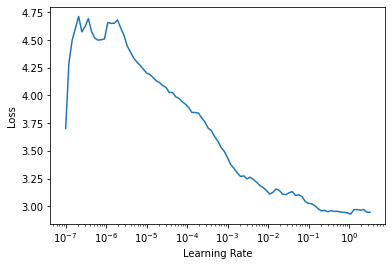

In [14]:
from fastai2.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,f_smape,time
0,1.810993,1.584216,0.512324,0.814250,1.686225,nan,nan,0.110506,01:09
1,1.704236,1.457823,0.486268,0.774352,1.888560,nan,nan,0.105555,01:10
2,1.649843,1.489586,0.480835,0.770334,1.615496,nan,nan,0.108494,01:11
3,1.599777,1.418724,0.476658,0.752617,1.705645,nan,nan,0.103655,01:09
4,1.490466,1.363848,0.440083,0.709690,1.960501,nan,nan,0.102861,01:10


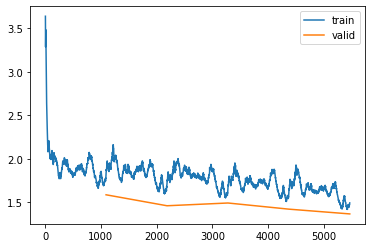

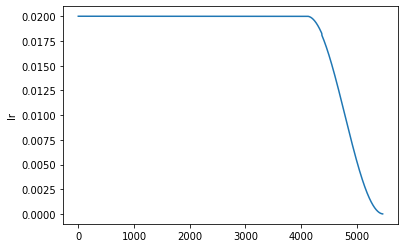

In [15]:
learn.fit_flat_cos(5, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

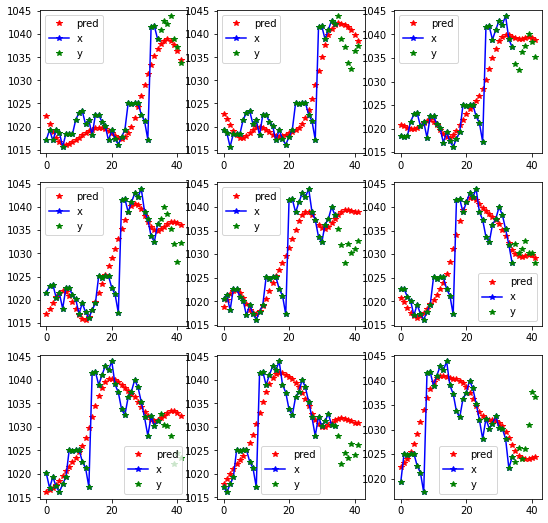

In [17]:
learn.show_results(0)

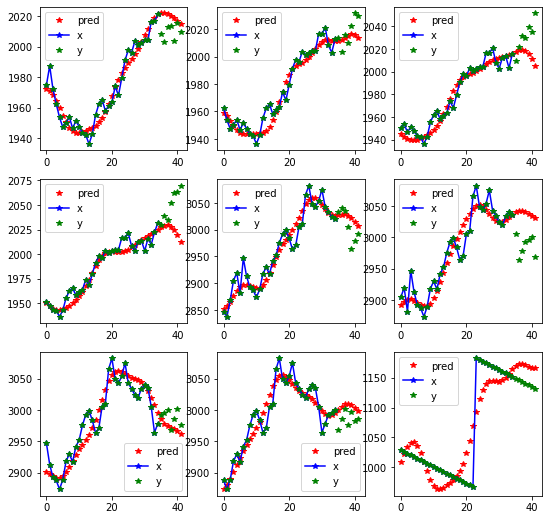

In [18]:
learn.show_results(1)

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,f_smape,time
0,1.424263,1.343198,0.420948,0.683976,1.796664,nan,nan,0.100251,01:28


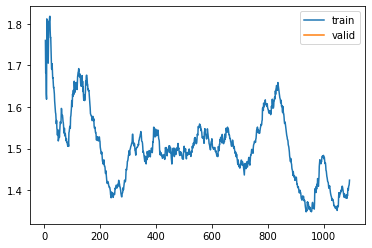

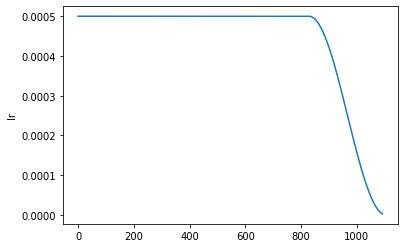

In [ ]:
learn.fit_flat_cos(1,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

## Interperation

In [19]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,1.2808248,0.12578407,-0.08569077,-0.06187745,0.1796875,1.0902514
theta_0_std,0.26519,0.08104574,0.66268957,0.4097473,0.12173311,0.6663508
theta_1_mean,0.0,-0.0008654712,0.32511836,0.2971403,-0.24606797,0.14985758
theta_1_std,0.0,0.0025685464,0.279926,0.2816404,0.298546,0.3349468
theta_2_mean,-0.0041518696,0.001206975,0.08984375,-0.11661168,-0.04089954,-0.062004503
theta_2_std,0.0010466882,0.00050746487,0.14342181,0.20864268,0.1293545,0.12580697
theta_3_mean,0.015779227,4.6875e-06,NaN,0.25079164,0.036999673,0.054956526
theta_3_std,0.15912743,1.4689242e-05,NaN,0.31157577,0.22201656,0.59105575
theta_4_mean,1.11071,0.023908217,NaN,NaN,-0.025488539,0.0049164467
theta_4_std,0.22121297,0.020769339,NaN,NaN,0.057381537,0.33296514


In [20]:
# hide
from fastai2.interpret import *
from fastseq.nbeats.interpret import *

In [21]:
interp = NBeatsInterpretation.from_learner(learn)

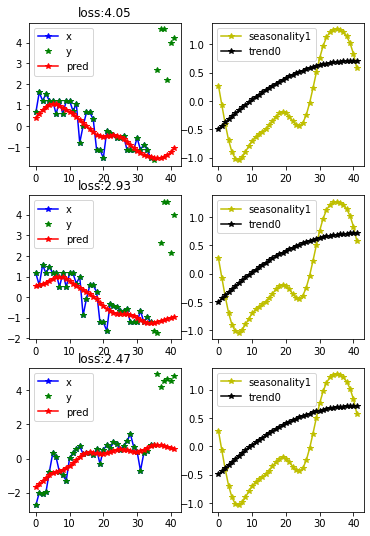

In [22]:
interp.plot_top_losses(3, combine_stack=True)